In [1]:
import os
import json
import torch
from tqdm import tqdm
from torchvision import ops
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from detr.datasets import transforms as T

from main import HicoDetDataset
from dataset.dataset_hicodet import HICODet, HICODetObject, to_tensor, ToTensor

In [2]:
normalize = T.Compose([
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
transforms = T.Compose([T.RandomResize([800], max_size=1333), normalize])

dataset_hicodet = HICODetObject(
    HICODet(root=os.path.join('hico_20160224_det', 'images', 'test2015'),
            anno_file=os.path.join('hico_20160224_det', 'instances_test2015.json'),
            target_transform=ToTensor(input_format='dict')
            ),
    transforms
)

In [3]:
dataset_ppdm = HicoDetDataset('hico_20160224_det', split='test', transforms=transforms)

In [ ]:
diff = []
for i in tqdm(range(len(dataset_hicodet))):
    fn_ppdm, img_ppdm, ann_ppdm = dataset_ppdm[i]
    fn_hicodet, img_hicodet, ann_hicodet = dataset_hicodet[i]
    if ann_ppdm['boxes'].size(0) != ann_hicodet['boxes'].size(0):
        diff.append(i)

In [ ]:
diff[:10]

In [4]:
def visualize(idx, dataset):
    fn, img, ann = dataset[idx]
    pil_img = Image.open(os.path.join('hico_20160224_det', 'images', 'test2015', fn))
    draw = ImageDraw.Draw(pil_img)
    boxes, sizes = ann['boxes'], ann['size']
    w, h = pil_img.size
    scale_fct = torch.tensor([w, h, w, h])
    boxes *= scale_fct
    boxes = ops.box_convert(boxes, 'cxcywh', 'xyxy')
    for box in boxes:
        draw.rectangle(box.tolist())
    return pil_img

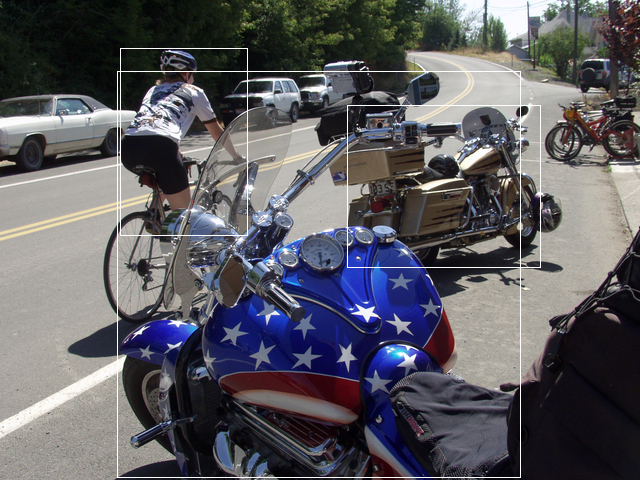

In [7]:
visualize(7, dataset_ppdm)

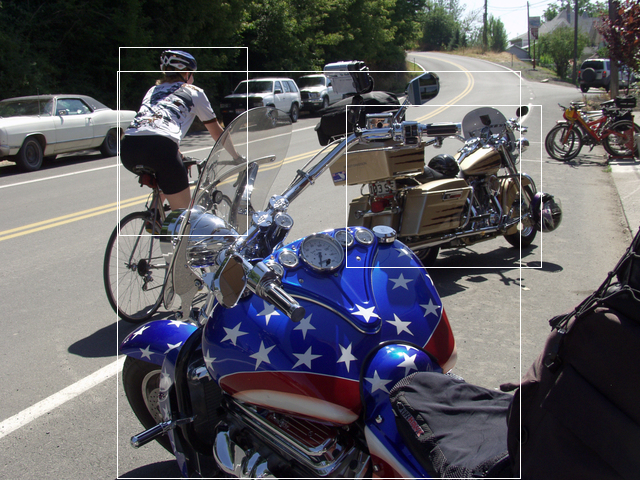

In [8]:
visualize(7, dataset_hicodet)

In [ ]:
with open('annotations/coco_classes.json') as fp:
    coco_lcasses = json.load(fp=fp)
with open('annotations/hico_verbs.json') as fp:
    hico_verbs = json.load(fp=fp)

In [9]:
label_map = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 13: 11, 14: 12,
 15: 13, 16: 14, 17: 15, 18: 16, 19: 17, 20: 18, 21: 19, 22: 20, 23: 21, 24: 22, 25: 23, 27: 24,
 28: 25, 31: 26, 32: 27, 33: 28, 34: 29, 35: 30, 36: 31, 37: 32, 38: 33, 39: 34, 40: 35, 41: 36,
 42: 37, 43: 38, 44: 39, 46: 40,47: 41, 48: 42, 49: 43, 50: 44,51: 45, 52: 46, 53: 47, 54: 48, 55: 49,
 56: 50, 57: 51, 58: 52, 59: 53, 60: 54, 61: 55, 62: 56, 63: 57, 64: 58, 65: 59, 67: 60, 70: 61, 72: 62,
 73: 63, 74: 64, 75: 65, 76: 66, 77: 67, 78: 68, 79: 69, 80: 70, 81: 71, 82: 72, 84: 73, 85: 74, 86: 75,
 87: 76, 88: 77, 89: 78, 90: 79}

In [10]:
set(range(80)) - set(label_map.keys())

{0, 12, 26, 29, 30, 45, 66, 68, 69, 71}

In [11]:
with open('annotations/coco_classes.json') as fp:
    coco_classes = json.load(fp)

In [13]:
from pprint import pprint

In [15]:
coco_classes

{'1': 'person',
 '2': 'bicycle',
 '3': 'car',
 '4': 'motorcycle',
 '5': 'airplane',
 '6': 'bus',
 '7': 'train',
 '8': 'truck',
 '9': 'boat',
 '10': 'traffic light',
 '11': 'fire hydrant',
 '13': 'stop sign',
 '14': 'parking meter',
 '15': 'bench',
 '16': 'bird',
 '17': 'cat',
 '18': 'dog',
 '19': 'horse',
 '20': 'sheep',
 '21': 'cow',
 '22': 'elephant',
 '23': 'bear',
 '24': 'zebra',
 '25': 'giraffe',
 '27': 'backpack',
 '28': 'umbrella',
 '31': 'handbag',
 '32': 'tie',
 '33': 'suitcase',
 '34': 'frisbee',
 '35': 'skis',
 '36': 'snowboard',
 '37': 'sports ball',
 '38': 'kite',
 '39': 'baseball bat',
 '40': 'baseball glove',
 '41': 'skateboard',
 '42': 'surfboard',
 '43': 'tennis racket',
 '44': 'bottle',
 '46': 'wine glass',
 '47': 'cup',
 '48': 'fork',
 '49': 'knife',
 '50': 'spoon',
 '51': 'bowl',
 '52': 'banana',
 '53': 'apple',
 '54': 'sandwich',
 '55': 'orange',
 '56': 'broccoli',
 '57': 'carrot',
 '58': 'hot dog',
 '59': 'pizza',
 '60': 'donut',
 '61': 'cake',
 '62': 'chair',
 '6